<a href="https://colab.research.google.com/github/grupo21dex/deliverable-1/blob/main/tratando_dados_deliverable1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primeiro Deliverable
#Projeto Roof Imóveis


#Determinar as 5 melhores e as 5 piores opções de compra explicando o porque

#Analisar os imóveis que foram vendidos mais de uma vez e usar como régua para avaliarmos os melhores imóveis

In [2]:
#bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import geopy


#Adicionando uma coluna 'address' com o endereço das residencias 

In [ ]:
#DataFrame
#dados = pd.read_csv('kc_house_data.csv')
#dados


In [ ]:
# localizar o endereço dado latitude e longitude:geolocator.reverse(Latitude+","+Longitude)
#controle
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")
#address = geolocator.reverse(str(dados['lat'][0])+','+str(dados['long'][0]))
#print(address)

10012, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States


In [ ]:
#determina o endereço dado a latitude e longitude e cria a coluna address com os endereços (DEMOROU 3 HORAS!!!!)
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")
#address = list()
#for x in dados.index:
 # address.append(geolocator.reverse(str(dados['lat'][x])+','+str(dados['long'][x])))
#dados['address'] = address

In [ ]:
#salvei um novo dataframe para não ter que carregar o endereço de novo
#dados.to_excel("df_cende.xlsx")

In [3]:
#dataframe com o endereço
df = pd.read_excel('df_cende.xlsx')
df.head(2)

Unnamed: 0          id             date   price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900         3       1.00   
1           1  6414100192  20141209T000000  538000         3       2.25   

   sqft_living  sqft_lot  floors  waterfront  ...  sqft_above  sqft_basement  \
0         1180      5650     1.0           0  ...        1180              0   
1         2570      7242     2.0           0  ...        2170            400   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15                                            address  
0        5650  10012, 61st Avenue South, Rainier Beach, Seatt...  
1        7639  837, Northeast 127th Street, Northgate, Seattl...  

[2 rows x 23 columns]

# Separar o endereço em numero , 'number','street','district','city','county', 'state','number2','country','x','y'

In [4]:
df['address'].str.split(',', expand=True)

0                             1                2             3  \
0      10012             61st Avenue South    Rainier Beach       Seattle   
1        837        Northeast 127th Street        Northgate       Seattle   
2      15109         81st Avenue Northeast        Moorlands       Kenmore   
3       9236      Fauntleroy Way Southwest       Fauntleroy       Seattle   
4        923        221st Avenue Northeast        Sammamish   King County   
...      ...                           ...              ...           ...   
21608    927             North 97th Street   Licton Springs     Greenwood   
21609   2211         Southwest 103rd Place     White Center       Seattle   
21610    902             26th Avenue South           Leschi       Seattle   
21611   2136   Northwest Boulder Way Drive            Talus      Issaquah   
21612    916             26th Avenue South           Leschi       Seattle   

                  4             5               6               7  \
0       King County    Washington           98178   United States   
1       King County    Washington           98125   United States   
2       King County    Washington           98028   United States   
3       King County    Washington           98136   United States   
4        Washington         98074   United States            None   
...             ...           ...             ...             ...   
21608       Seattle   King County      Washington           98103   
21609   King County    Washington           98146   United States   
21610   King County    Washington           98144   United States   
21611   King County    Washington           98027   United States   
21612   King County    Washington           98144   United States   

                    8     9  
0                None  None  
1                None  None  
2                None  None  
3                None  None  
4                None  None  
...               ...   ...  
21608   United States  None  
21609            None  None  
21610            None  None  
21611            None  None  
21612            None  None  

[21613 rows x 10 columns]

#Adicionando colunas

#Separação do endereço

In [5]:
df[['number','street','district','city','county', 'state','number2','country','x','y']] = df['address'].str.split(',', expand=True)
df.tail(2)

Unnamed: 0          id             date   price  bedrooms  bathrooms  \
21611       21611   291310100  20150116T000000  400000         3       2.50   
21612       21612  1523300157  20141015T000000  325000         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  ...  number  \
21611         1600      2388     2.0           0  ...    2136   
21612         1020      1076     2.0           0  ...     916   

                             street  district       city        county  \
21611   Northwest Boulder Way Drive     Talus   Issaquah   King County   
21612             26th Avenue South    Leschi    Seattle   King County   

             state  number2         country     x     y  
21611   Washington    98027   United States  None  None  
21612   Washington    98144   United States  None  None  

[2 rows x 33 columns]

#Preço por area

In [6]:
#preço/areaterreno
df['price/lot'] = df['price'] / df['sqft_lot']
df.head(2)

Unnamed: 0          id             date   price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900         3       1.00   
1           1  6414100192  20141209T000000  538000         3       2.25   

   sqft_living  sqft_lot  floors  waterfront  ...                   street  \
0         1180      5650     1.0           0  ...        61st Avenue South   
1         2570      7242     2.0           0  ...   Northeast 127th Street   

         district      city        county        state  number2  \
0   Rainier Beach   Seattle   King County   Washington    98178   
1       Northgate   Seattle   King County   Washington    98125   

          country     x     y  price/lot  
0   United States  None  None  39.274336  
1   United States  None  None  74.288870  

[2 rows x 34 columns]

In [7]:
#preço por area habitavel
df['price/living'] = df['price'] / df['sqft_living']

#Coluna resell é o numéro de vezes que a casa apareceu anteriormente(ex quando aparece a primeira vez mostra 1, se aparecer de novo mostra 2...), baseado no id da casa, indicando que ela foi vendida mais de uma vez

In [ ]:
#mostra quantas vezes cada imóvel foi vendido
unico = list()
repetido = list()
for x in df['id']:
  unico.append(x)
  repetido.append(unico.count(x))
repetido

In [9]:
#cria a coluna resell
#dataframe com número de vezes que cada imóvel foi vendido
df['resell'] = repetido
df.head(2)


Unnamed: 0          id             date   price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900         3       1.00   
1           1  6414100192  20141209T000000  538000         3       2.25   

   sqft_living  sqft_lot  floors  waterfront  ...      city        county  \
0         1180      5650     1.0           0  ...   Seattle   King County   
1         2570      7242     2.0           0  ...   Seattle   King County   

         state  number2         country     x     y  price/lot  price/living  \
0   Washington    98178   United States  None  None  39.274336    188.050847   
1   Washington    98125   United States  None  None  74.288870    209.338521   

   resell  
0       1  
1       1  

[2 rows x 36 columns]

#Adicionando coluna mes e ano da venda 

In [10]:
df['date'] = df['date'].astype(np.datetime64)
df['floors'] = df['floors'].astype(np.int64)
df

Unnamed: 0          id       date   price  bedrooms  bathrooms  \
0               0  7129300520 2014-10-13  221900         3       1.00   
1               1  6414100192 2014-12-09  538000         3       2.25   
2               2  5631500400 2015-02-25  180000         2       1.00   
3               3  2487200875 2014-12-09  604000         4       3.00   
4               4  1954400510 2015-02-18  510000         3       2.00   
...           ...         ...        ...     ...       ...        ...   
21608       21608   263000018 2014-05-21  360000         3       2.50   
21609       21609  6600060120 2015-02-23  400000         4       2.50   
21610       21610  1523300141 2014-06-23  402101         2       0.75   
21611       21611   291310100 2015-01-16  400000         3       2.50   
21612       21612  1523300157 2014-10-15  325000         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  ...          city  \
0             1180      5650       1           0  ...       Seattle   
1             2570      7242       2           0  ...       Seattle   
2              770     10000       1           0  ...       Kenmore   
3             1960      5000       1           0  ...       Seattle   
4             1680      8080       1           0  ...   King County   
...            ...       ...     ...         ...  ...           ...   
21608         1530      1131       3           0  ...     Greenwood   
21609         2310      5813       2           0  ...       Seattle   
21610         1020      1350       2           0  ...       Seattle   
21611         1600      2388       2           0  ...      Issaquah   
21612         1020      1076       2           0  ...       Seattle   

             county         state         number2         country  \
0       King County    Washington           98178   United States   
1       King County    Washington           98125   United States   
2       King County    Washington           98028   United States   
3       King County    Washington           98136   United States   
4        Washington         98074   United States            None   
...             ...           ...             ...             ...   
21608       Seattle   King County      Washington           98103   
21609   King County    Washington           98146   United States   
21610   King County    Washington           98144   United States   
21611   King County    Washington           98027   United States   
21612   King County    Washington           98144   United States   

                    x     y   price/lot  price/living  resell  
0                None  None   39.274336    188.050847       1  
1                None  None   74.288870    209.338521       1  
2                None  None   18.000000    233.766234       1  
3                None  None  120.800000    308.163265       1  
4                None  None   63.118812    303.571429       1  
...               ...   ...         ...           ...     ...  
21608   United States  None  318.302387    235.294118       1  
21609            None  None   68.811285    173.160173       1  
21610            None  None  297.852593    394.216667       1  
21611            None  None  167.504188    250.000000       1  
21612            None  None  302.044610    318.627451       1  

[21613 rows x 36 columns]

In [11]:
df['Ano da Venda'] = df['date'].dt.year
df['Mês da Venda'] = df['date'].dt.month
df

Unnamed: 0          id       date   price  bedrooms  bathrooms  \
0               0  7129300520 2014-10-13  221900         3       1.00   
1               1  6414100192 2014-12-09  538000         3       2.25   
2               2  5631500400 2015-02-25  180000         2       1.00   
3               3  2487200875 2014-12-09  604000         4       3.00   
4               4  1954400510 2015-02-18  510000         3       2.00   
...           ...         ...        ...     ...       ...        ...   
21608       21608   263000018 2014-05-21  360000         3       2.50   
21609       21609  6600060120 2015-02-23  400000         4       2.50   
21610       21610  1523300141 2014-06-23  402101         2       0.75   
21611       21611   291310100 2015-01-16  400000         3       2.50   
21612       21612  1523300157 2014-10-15  325000         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  ...         state  \
0             1180      5650       1           0  ...    Washington   
1             2570      7242       2           0  ...    Washington   
2              770     10000       1           0  ...    Washington   
3             1960      5000       1           0  ...    Washington   
4             1680      8080       1           0  ...         98074   
...            ...       ...     ...         ...  ...           ...   
21608         1530      1131       3           0  ...   King County   
21609         2310      5813       2           0  ...    Washington   
21610         1020      1350       2           0  ...    Washington   
21611         1600      2388       2           0  ...    Washington   
21612         1020      1076       2           0  ...    Washington   

              number2         country               x     y   price/lot  \
0               98178   United States            None  None   39.274336   
1               98125   United States            None  None   74.288870   
2               98028   United States            None  None   18.000000   
3               98136   United States            None  None  120.800000   
4       United States            None            None  None   63.118812   
...               ...             ...             ...   ...         ...   
21608      Washington           98103   United States  None  318.302387   
21609           98146   United States            None  None   68.811285   
21610           98144   United States            None  None  297.852593   
21611           98027   United States            None  None  167.504188   
21612           98144   United States            None  None  302.044610   

       price/living  resell  Ano da Venda  Mês da Venda  
0        188.050847       1          2014            10  
1        209.338521       1          2014            12  
2        233.766234       1          2015             2  
3        308.163265       1          2014            12  
4        303.571429       1          2015             2  
...             ...     ...           ...           ...  
21608    235.294118       1          2014             5  
21609    173.160173       1          2015             2  
21610    394.216667       1          2014             6  
21611    250.000000       1          2015             1  
21612    318.627451       1          2014            10  

[21613 rows x 38 columns]

In [12]:
df[df['Ano da Venda']==2015]

Unnamed: 0          id       date    price  bedrooms  bathrooms  \
2               2  5631500400 2015-02-25   180000         2        1.0   
4               4  1954400510 2015-02-18   510000         3        2.0   
7               7  2008000270 2015-01-15   291850         3        1.5   
8               8  2414600126 2015-04-15   229500         3        1.0   
9               9  3793500160 2015-03-12   323000         3        2.5   
...           ...         ...        ...      ...       ...        ...   
21604       21604  9834201367 2015-01-26   429000         3        2.0   
21606       21606  7936000429 2015-03-26  1007500         4        3.5   
21607       21607  2997800021 2015-02-19   475000         3        2.5   
21609       21609  6600060120 2015-02-23   400000         4        2.5   
21611       21611   291310100 2015-01-16   400000         3        2.5   

       sqft_living  sqft_lot  floors  waterfront  ...         state  \
2              770     10000       1           0  ...    Washington   
4             1680      8080       1           0  ...         98074   
7             1060      9711       1           0  ...    Washington   
8             1780      7470       1           0  ...    Washington   
9             1890      6560       2           0  ...   King County   
...            ...       ...     ...         ...  ...           ...   
21604         1490      1126       3           0  ...    Washington   
21606         3510      7200       2           0  ...    Washington   
21607         1310      1294       2           0  ...    Washington   
21609         2310      5813       2           0  ...    Washington   
21611         1600      2388       2           0  ...    Washington   

              number2         country               x     y   price/lot  \
2               98028   United States            None  None   18.000000   
4       United States            None            None  None   63.118812   
7               98198   United States            None  None   30.053548   
8               98146   United States            None  None   30.722892   
9          Washington           98038   United States  None   49.237805   
...               ...             ...             ...   ...         ...   
21604           98144   United States            None  None  380.994671   
21606           98136   United States            None  None  139.930556   
21607           98116   United States            None  None  367.078825   
21609           98146   United States            None  None   68.811285   
21611           98027   United States            None  None  167.504188   

       price/living  resell  Ano da Venda  Mês da Venda  
2        233.766234       1          2015             2  
4        303.571429       1          2015             2  
7        275.330189       1          2015             1  
8        128.932584       1          2015             4  
9        170.899471       1          2015             3  
...             ...     ...           ...           ...  
21604    287.919463       1          2015             1  
21606    287.037037       1          2015             3  
21607    362.595420       1          2015             2  
21609    173.160173       1          2015             2  
21611    250.000000       1          2015             1  

[6980 rows x 38 columns]

In [48]:
df_2015 = df[df['Ano da Venda']==2014]
df_2015.value_counts()

Unnamed: 0  id          date        price    bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long      sqft_living15  sqft_lot15  address                                                                                                                                                                      number                                                street                   district                    city               county           state      number2       country      x            y               price/lot   price/living  resell  Ano da Venda  Mês da Venda
27          3303700376  2014-12-01  667000   3         1.00       1400         1581      1       0           0     5          8      1400        0              1909      0             98112    47.6221  -122.314  1860           3861        Moana Apartments, 1414, East Harrison Street, Madison Valley, Capitol Hill, Se

In [47]:
df_2015 = df[df['Ano da Venda']==2015]
df_2015.value_counts()

Unnamed: 0  id          date        price   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long      sqft_living15  sqft_lot15  address                                                                                                                                                                 number                                               street                   district                city                 county               state       number2       country      x       y               price/lot   price/living  resell  Ano da Venda  Mês da Venda
181         8123100045  2015-04-14  470000  4         3.00       2380         5125      1       0           0     4          7      1680        700            1925      0             98126    47.5384  -122.376  1410           5375        Our Lady of Guadalupe Church, 7000, 35th Avenue Southwest, High Point, Delridge, Seattle

Text(0, 0.5, 'Count')

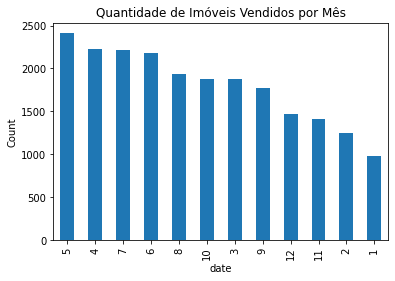

In [15]:
#no periodo de novembro a fevereiro
#o ano de 2015 so teve vendas ate abril
df['Mês da Venda'].value_counts().plot(kind='bar')
plt.title('Quantidade de Imóveis Vendidos por Mês')
plt.xlabel('date')
plt.ylabel('Count')


#Verificando os dados

In [ ]:
df[df['']]

In [16]:
#analisando tipos dos dados
print(df.dtypes)

Unnamed: 0                int64
id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
address                  object
number                   object
street                   object
district                 object
city                     object
county                   object
state                    object
number2                  object
country                  object
x       

In [ ]:
#verificando valores nulos
df.isnull().sum()

In [ ]:
#informações
df.info()

#Estatistica descritiva

#Separar do data frame apenas valores numerais para construção de graficos e correlações 

In [19]:
df.select_dtypes(include='number')

Unnamed: 0          id   price  bedrooms  bathrooms  sqft_living  \
0               0  7129300520  221900         3       1.00         1180   
1               1  6414100192  538000         3       2.25         2570   
2               2  5631500400  180000         2       1.00          770   
3               3  2487200875  604000         4       3.00         1960   
4               4  1954400510  510000         3       2.00         1680   
...           ...         ...     ...       ...        ...          ...   
21608       21608   263000018  360000         3       2.50         1530   
21609       21609  6600060120  400000         4       2.50         2310   
21610       21610  1523300141  402101         2       0.75         1020   
21611       21611   291310100  400000         3       2.50         1600   
21612       21612  1523300157  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
0          5650       1           0     0  ...    98178  47.5112 -122.257   
1          7242       2           0     0  ...    98125  47.7210 -122.319   
2         10000       1           0     0  ...    98028  47.7379 -122.233   
3          5000       1           0     0  ...    98136  47.5208 -122.393   
4          8080       1           0     0  ...    98074  47.6168 -122.045   
...         ...     ...         ...   ...  ...      ...      ...      ...   
21608      1131       3           0     0  ...    98103  47.6993 -122.346   
21609      5813       2           0     0  ...    98146  47.5107 -122.362   
21610      1350       2           0     0  ...    98144  47.5944 -122.299   
21611      2388       2           0     0  ...    98027  47.5345 -122.069   
21612      1076       2           0     0  ...    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15   price/lot  price/living  resell  \
0               1340        5650   39.274336    188.050847       1   
1               1690        7639   74.288870    209.338521       1   
2               2720        8062   18.000000    233.766234       1   
3               1360        5000  120.800000    308.163265       1   
4               1800        7503   63.118812    303.571429       1   
...              ...         ...         ...           ...     ...   
21608           1530        1509  318.302387    235.294118       1   
21609           1830        7200   68.811285    173.160173       1   
21610           1020        2007  297.852593    394.216667       1   
21611           1410        1287  167.504188    250.000000       1   
21612           1020        1357  302.044610    318.627451       1   

       Ano da Venda  Mês da Venda  
0              2014            10  
1              2014            12  
2              2015             2  
3              2014            12  
4              2015             2  
...             ...           ...  
21608          2014             5  
21609          2015             2  
21610          2014             6  
21611          2015             1  
21612          2014            10  

[21613 rows x 26 columns]

In [20]:
#removendo colunas desnecessarias
#criação do dataframe sem as colunas desnecessarias
numdf = df.drop(['id','zipcode', 'lat','long', 'address','number','street','district','city','county', 'state','number2','country','x','y'],axis = 1)
pd.DataFrame(numdf).head(2)

Unnamed: 0       date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0           0 2014-10-13  221900         3       1.00         1180      5650   
1           1 2014-12-09  538000         3       2.25         2570      7242   

   floors  waterfront  view  ...  sqft_basement  yr_built  yr_renovated  \
0       1           0     0  ...              0      1955             0   
1       2           0     0  ...            400      1951          1991   

   sqft_living15  sqft_lot15  price/lot  price/living  resell  Ano da Venda  \
0           1340        5650  39.274336    188.050847       1          2014   
1           1690        7639  74.288870    209.338521       1          2014   

   Mês da Venda  
0            10  
1            12  

[2 rows x 23 columns]

#usando somente as colunas:
#price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated,	sqft_living15, sqft_lot15, price/living, price/lot, resell

#Reduzindo outliers

In [21]:
def limite_outiliers(atributo):
  q1= atributo.quantile(0.25)
  q3= atributo.quantile(0.75)
  amplitude = q3 - q1
  return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude # retorna uma tupla com os valores:  limite inferior e limite superior

  #print(limite_outiliers(df['price']))


In [22]:
#lucas
#primeiro quartil
q1 = df['price'].quantile(.25)
q1

321950.0

In [23]:
#lucas
#terceiro quartil
q3 = df['price'].quantile(.75)
q3

645000.0

In [24]:
#lucas
#intervalo interquartil
iiq = q3 - q1
iiq

323050.0

In [25]:
#lucas
#Caculando limite inferior
limite_inferior =q1 - 1.5 * iiq
limite_inferior

-162625.0

In [26]:
#lucas
##Caculando limite superior
limite_superior = q3 + 1.5 * iiq
limite_superior

1129575.0

In [27]:
preco = df['price']

In [28]:
#lucas
#pegando os dados que estão dentro do limite
selecao = (preco >= limite_inferior) & (preco <= limite_superior)
selecao

0        True
1        True
2        True
3        True
4        True
         ... 
21608    True
21609    True
21610    True
21611    True
21612    True
Name: price, Length: 21613, dtype: bool

In [29]:
#lucas
#Salvando os dados em um novo dataframe
#df_new = dataframe removido as colunas desnececssarias e sem os outliers
df_new = df[selecao]
df_new

Unnamed: 0          id       date   price  bedrooms  bathrooms  \
0               0  7129300520 2014-10-13  221900         3       1.00   
1               1  6414100192 2014-12-09  538000         3       2.25   
2               2  5631500400 2015-02-25  180000         2       1.00   
3               3  2487200875 2014-12-09  604000         4       3.00   
4               4  1954400510 2015-02-18  510000         3       2.00   
...           ...         ...        ...     ...       ...        ...   
21608       21608   263000018 2014-05-21  360000         3       2.50   
21609       21609  6600060120 2015-02-23  400000         4       2.50   
21610       21610  1523300141 2014-06-23  402101         2       0.75   
21611       21611   291310100 2015-01-16  400000         3       2.50   
21612       21612  1523300157 2014-10-15  325000         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  ...         state  \
0             1180      5650       1           0  ...    Washington   
1             2570      7242       2           0  ...    Washington   
2              770     10000       1           0  ...    Washington   
3             1960      5000       1           0  ...    Washington   
4             1680      8080       1           0  ...         98074   
...            ...       ...     ...         ...  ...           ...   
21608         1530      1131       3           0  ...   King County   
21609         2310      5813       2           0  ...    Washington   
21610         1020      1350       2           0  ...    Washington   
21611         1600      2388       2           0  ...    Washington   
21612         1020      1076       2           0  ...    Washington   

              number2         country               x     y   price/lot  \
0               98178   United States            None  None   39.274336   
1               98125   United States            None  None   74.288870   
2               98028   United States            None  None   18.000000   
3               98136   United States            None  None  120.800000   
4       United States            None            None  None   63.118812   
...               ...             ...             ...   ...         ...   
21608      Washington           98103   United States  None  318.302387   
21609           98146   United States            None  None   68.811285   
21610           98144   United States            None  None  297.852593   
21611           98027   United States            None  None  167.504188   
21612           98144   United States            None  None  302.044610   

       price/living  resell  Ano da Venda  Mês da Venda  
0        188.050847       1          2014            10  
1        209.338521       1          2014            12  
2        233.766234       1          2015             2  
3        308.163265       1          2014            12  
4        303.571429       1          2015             2  
...             ...     ...           ...           ...  
21608    235.294118       1          2014             5  
21609    173.160173       1          2015             2  
21610    394.216667       1          2014             6  
21611    250.000000       1          2015             1  
21612    318.627451       1          2014            10  

[20467 rows x 38 columns]

In [30]:
#removendo colunas desnecessarias do df_new
df_new = df_new.drop(['id','zipcode', 'lat','long', 'address','number','street','district','city','county', 'state','number2','country','x','y'],axis = 1)

In [31]:
#modificando a coluna 'date' para mostrar apenas ano - mes - dia e modificando a coluna 'floors' para numero inteiros
df_new['date'] = df_new['date'].astype(np.datetime64)
df_new['floors'] = df['floors'].astype(np.int64)
df_new

Unnamed: 0       date   price  bedrooms  bathrooms  sqft_living  \
0               0 2014-10-13  221900         3       1.00         1180   
1               1 2014-12-09  538000         3       2.25         2570   
2               2 2015-02-25  180000         2       1.00          770   
3               3 2014-12-09  604000         4       3.00         1960   
4               4 2015-02-18  510000         3       2.00         1680   
...           ...        ...     ...       ...        ...          ...   
21608       21608 2014-05-21  360000         3       2.50         1530   
21609       21609 2015-02-23  400000         4       2.50         2310   
21610       21610 2014-06-23  402101         2       0.75         1020   
21611       21611 2015-01-16  400000         3       2.50         1600   
21612       21612 2014-10-15  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0          5650       1           0     0  ...              0      1955   
1          7242       2           0     0  ...            400      1951   
2         10000       1           0     0  ...              0      1933   
3          5000       1           0     0  ...            910      1965   
4          8080       1           0     0  ...              0      1987   
...         ...     ...         ...   ...  ...            ...       ...   
21608      1131       3           0     0  ...              0      2009   
21609      5813       2           0     0  ...              0      2014   
21610      1350       2           0     0  ...              0      2009   
21611      2388       2           0     0  ...              0      2004   
21612      1076       2           0     0  ...              0      2008   

       yr_renovated  sqft_living15  sqft_lot15   price/lot  price/living  \
0                 0           1340        5650   39.274336    188.050847   
1              1991           1690        7639   74.288870    209.338521   
2                 0           2720        8062   18.000000    233.766234   
3                 0           1360        5000  120.800000    308.163265   
4                 0           1800        7503   63.118812    303.571429   
...             ...            ...         ...         ...           ...   
21608             0           1530        1509  318.302387    235.294118   
21609             0           1830        7200   68.811285    173.160173   
21610             0           1020        2007  297.852593    394.216667   
21611             0           1410        1287  167.504188    250.000000   
21612             0           1020        1357  302.044610    318.627451   

       resell  Ano da Venda  Mês da Venda  
0           1          2014            10  
1           1          2014            12  
2           1          2015             2  
3           1          2014            12  
4           1          2015             2  
...       ...           ...           ...  
21608       1          2014             5  
21609       1          2015             2  
21610       1          2014             6  
21611       1          2015             1  
21612       1          2014            10  

[20467 rows x 23 columns]

In [32]:
#lucas
#descrição
numdf.describe().round(3).T

count        mean         std        min         25%  \
Unnamed: 0     21613.0   10806.000    6239.280      0.000    5403.000   
price          21613.0  540088.142  367127.196  75000.000  321950.000   
bedrooms       21613.0       3.371       0.930      0.000       3.000   
bathrooms      21613.0       2.115       0.770      0.000       1.750   
sqft_living    21613.0    2079.900     918.441    290.000    1427.000   
sqft_lot       21613.0   15106.968   41420.512    520.000    5040.000   
floors         21613.0       1.446       0.552      1.000       1.000   
waterfront     21613.0       0.008       0.087      0.000       0.000   
view           21613.0       0.234       0.766      0.000       0.000   
condition      21613.0       3.409       0.651      1.000       3.000   
grade          21613.0       7.657       1.175      1.000       7.000   
sqft_above     21613.0    1788.391     828.091    290.000    1190.000   
sqft_basement  21613.0     291.509     442.575      0.000       0.000   
yr_built       21613.0    1971.005      29.373   1900.000    1951.000   
yr_renovated   21613.0      84.402     401.679      0.000       0.000   
sqft_living15  21613.0    1986.552     685.391    399.000    1490.000   
sqft_lot15     21613.0   12768.456   27304.180    651.000    5100.000   
price/lot      21613.0      88.967      94.055      0.163      33.333   
price/living   21613.0     264.157     110.061     87.588     182.292   
resell         21613.0       1.008       0.091      1.000       1.000   
Ano da Venda   21613.0    2014.323       0.468   2014.000    2014.000   
Mês da Venda   21613.0       6.574       3.115      1.000       4.000   

                      50%         75%          max  
Unnamed: 0      10806.000   16209.000    21612.000  
price          450000.000  645000.000  7700000.000  
bedrooms            3.000       4.000       33.000  
bathrooms           2.250       2.500        8.000  
sqft_living      1910.000    2550.000    13540.000  
sqft_lot         7618.000   10688.000  1651359.000  
floors              1.000       2.000        3.000  
waterfront          0.000       0.000        1.000  
view                0.000       0.000        4.000  
condition           3.000       4.000        5.000  
grade               7.000       8.000       13.000  
sqft_above       1560.000    2210.000     9410.000  
sqft_basement       0.000     560.000     4820.000  
yr_built         1975.000    1997.000     2015.000  
yr_renovated        0.000       0.000     2015.000  
sqft_living15    1840.000    2360.000     6210.000  
sqft_lot15       7620.000   10083.000   871200.000  
price/lot          59.223     107.595     2027.209  
price/living      244.645     318.323      810.139  
resell              1.000       1.000        3.000  
Ano da Venda     2014.000    2015.000     2015.000  
Mês da Venda        6.000       9.000       12.000

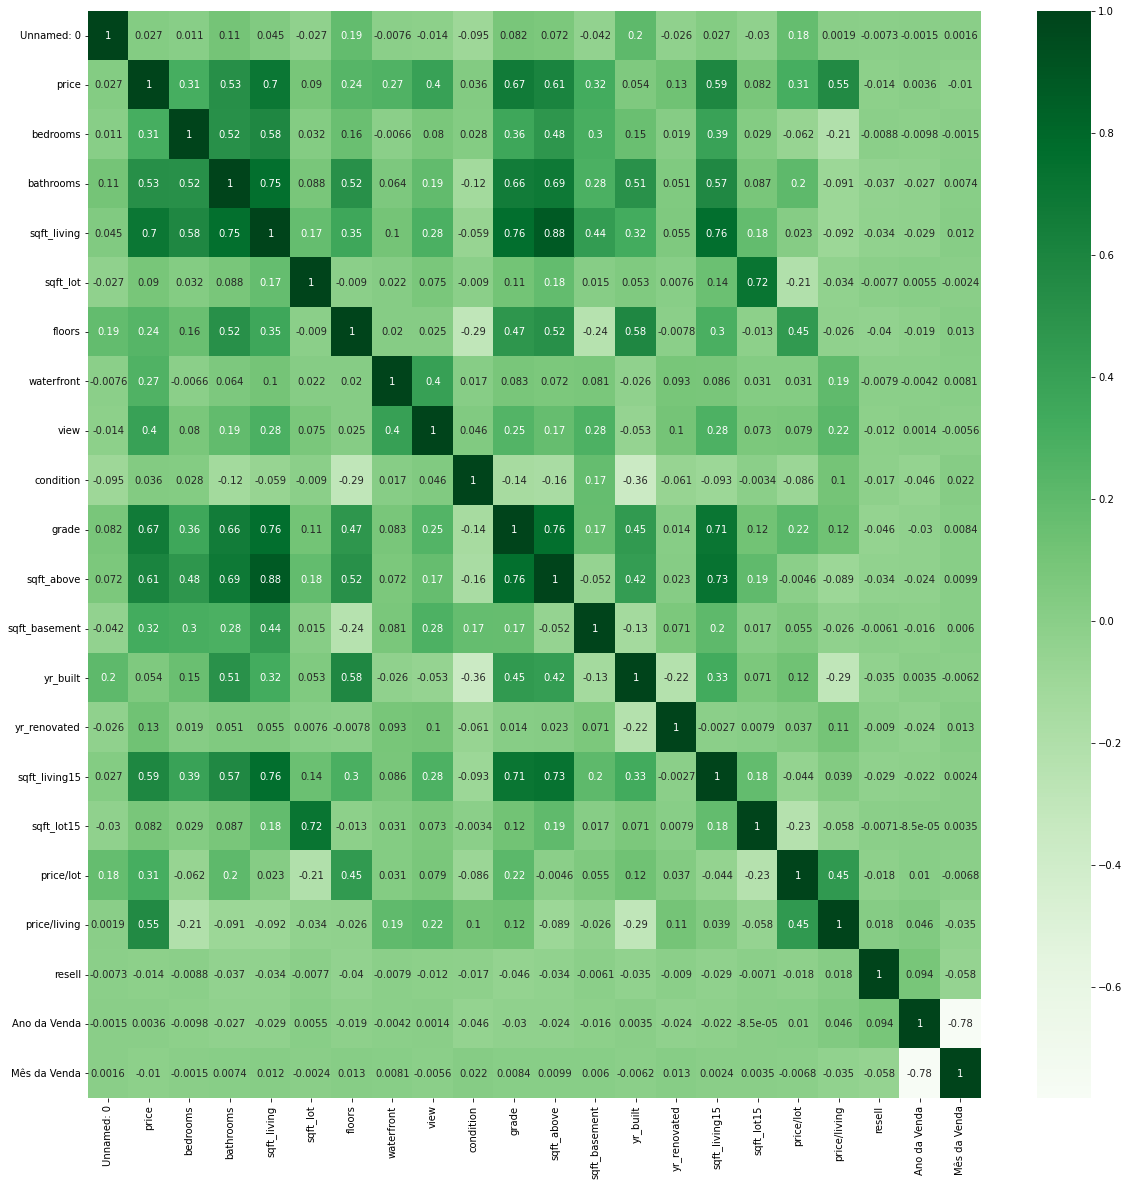

In [33]:
#lucas
# vendo a correlação das variaveis em um graficor de cores
plt.figure(figsize = (20,20))
sns.heatmap(numdf.corr(),  annot=True, cmap='Greens')

Unnamed: 0     price  bedrooms  bathrooms  sqft_living  \
Unnamed: 0       1.000000  0.031693  0.006075   0.109351     0.042197   
price            0.031693  1.000000  0.296956   0.455927     0.622333   
bedrooms         0.006075  0.296956  1.000000   0.493044     0.584609   
bathrooms        0.109351  0.455927  0.493044   1.000000     0.716684   
sqft_living      0.042197  0.622333  0.584609   0.716684     1.000000   
sqft_lot        -0.029204  0.093950  0.023992   0.064896     0.158850   
floors           0.188960  0.248508  0.134316   0.523132     0.342741   
waterfront       0.000115  0.051449 -0.030550  -0.003651     0.001844   
view            -0.017721  0.238268  0.038385   0.096833     0.168774   
condition       -0.094647  0.038275  0.026833  -0.135490    -0.072131   
grade            0.084841  0.631182  0.322541   0.614698     0.705620   
sqft_above       0.072307  0.530451  0.463458   0.638181     0.853561   
sqft_basement   -0.048635  0.235701  0.283360   0.222877     0.376601   
yr_built         0.198431  0.061144  0.159359   0.543318     0.353754   
yr_renovated    -0.022994  0.083601  0.004063   0.025696     0.020877   
sqft_living15    0.028618  0.562090  0.371076   0.528845     0.738190   
sqft_lot15      -0.032546  0.082420  0.020622   0.064566     0.172291   
price/lot        0.189600  0.301536 -0.103879   0.166241    -0.065235   
resell          -0.006403 -0.015247 -0.006072  -0.038102    -0.038039   

               sqft_lot    floors  waterfront      view  condition     grade  \
Unnamed: 0    -0.029204  0.188960    0.000115 -0.017721  -0.094647  0.084841   
price          0.093950  0.248508    0.051449  0.238268   0.038275  0.631182   
bedrooms       0.023992  0.134316   -0.030550  0.038385   0.026833  0.322541   
bathrooms      0.064896  0.523132   -0.003651  0.096833  -0.135490  0.614698   
sqft_living    0.158850  0.342741    0.001844  0.168774  -0.072131  0.705620   
sqft_lot       1.000000 -0.022303    0.024765  0.078493  -0.003344  0.093201   
floors        -0.022303  1.000000   -0.003490 -0.014617  -0.305018  0.475784   
waterfront     0.024765 -0.003490    1.000000  0.294325   0.014142 -0.013252   
view           0.078493 -0.014617    0.294325  1.000000   0.034972  0.132704   
condition     -0.003344 -0.305018    0.014142  0.034972   1.000000 -0.167572   
grade          0.093201  0.475784   -0.013252  0.132704  -0.167572  1.000000   
sqft_above     0.162479  0.524110   -0.005489  0.067272  -0.177833  0.710093   
sqft_basement  0.012009 -0.282657    0.013254  0.200095   0.179565  0.074052   
yr_built       0.043065  0.599340   -0.038959 -0.065981  -0.353447  0.491533   
yr_renovated   0.010695 -0.015998    0.059733  0.062833  -0.060215 -0.019778   
sqft_living15  0.142829  0.289681    0.004481  0.187538  -0.117745  0.671115   
sqft_lot15     0.710757 -0.024656    0.031093  0.075686   0.001100  0.102193   
price/lot     -0.210423  0.452054   -0.012521  0.017268  -0.103586  0.177202   
resell        -0.009813 -0.039135   -0.004989 -0.016258  -0.020191 -0.052753   

               sqft_above  sqft_basement  yr_built  yr_renovated  \
Unnamed: 0       0.072307      -0.048635  0.198431     -0.022994   
price            0.530451       0.235701  0.061144      0.083601   
bedrooms         0.463458       0.283360  0.159359      0.004063   
bathrooms        0.638181       0.222877  0.543318      0.025696   
sqft_living      0.853561       0.376601  0.353754      0.020877   
sqft_lot         0.162479       0.012009  0.043065      0.010695   
floors           0.524110      -0.282657  0.599340     -0.015998   
waterfront      -0.005489       0.013254 -0.038959      0.059733   
view             0.067272       0.200095 -0.065981      0.062833   
condition       -0.177833       0.179565 -0.353447     -0.060215   
grade            0.710093       0.074052  0.491533     -0.019778   
sqft_above       1.000000      -0.161184  0.461994     -0.001862   
sqft_basement   -0.161184       1.000000 -0.151348      0.042858   
y

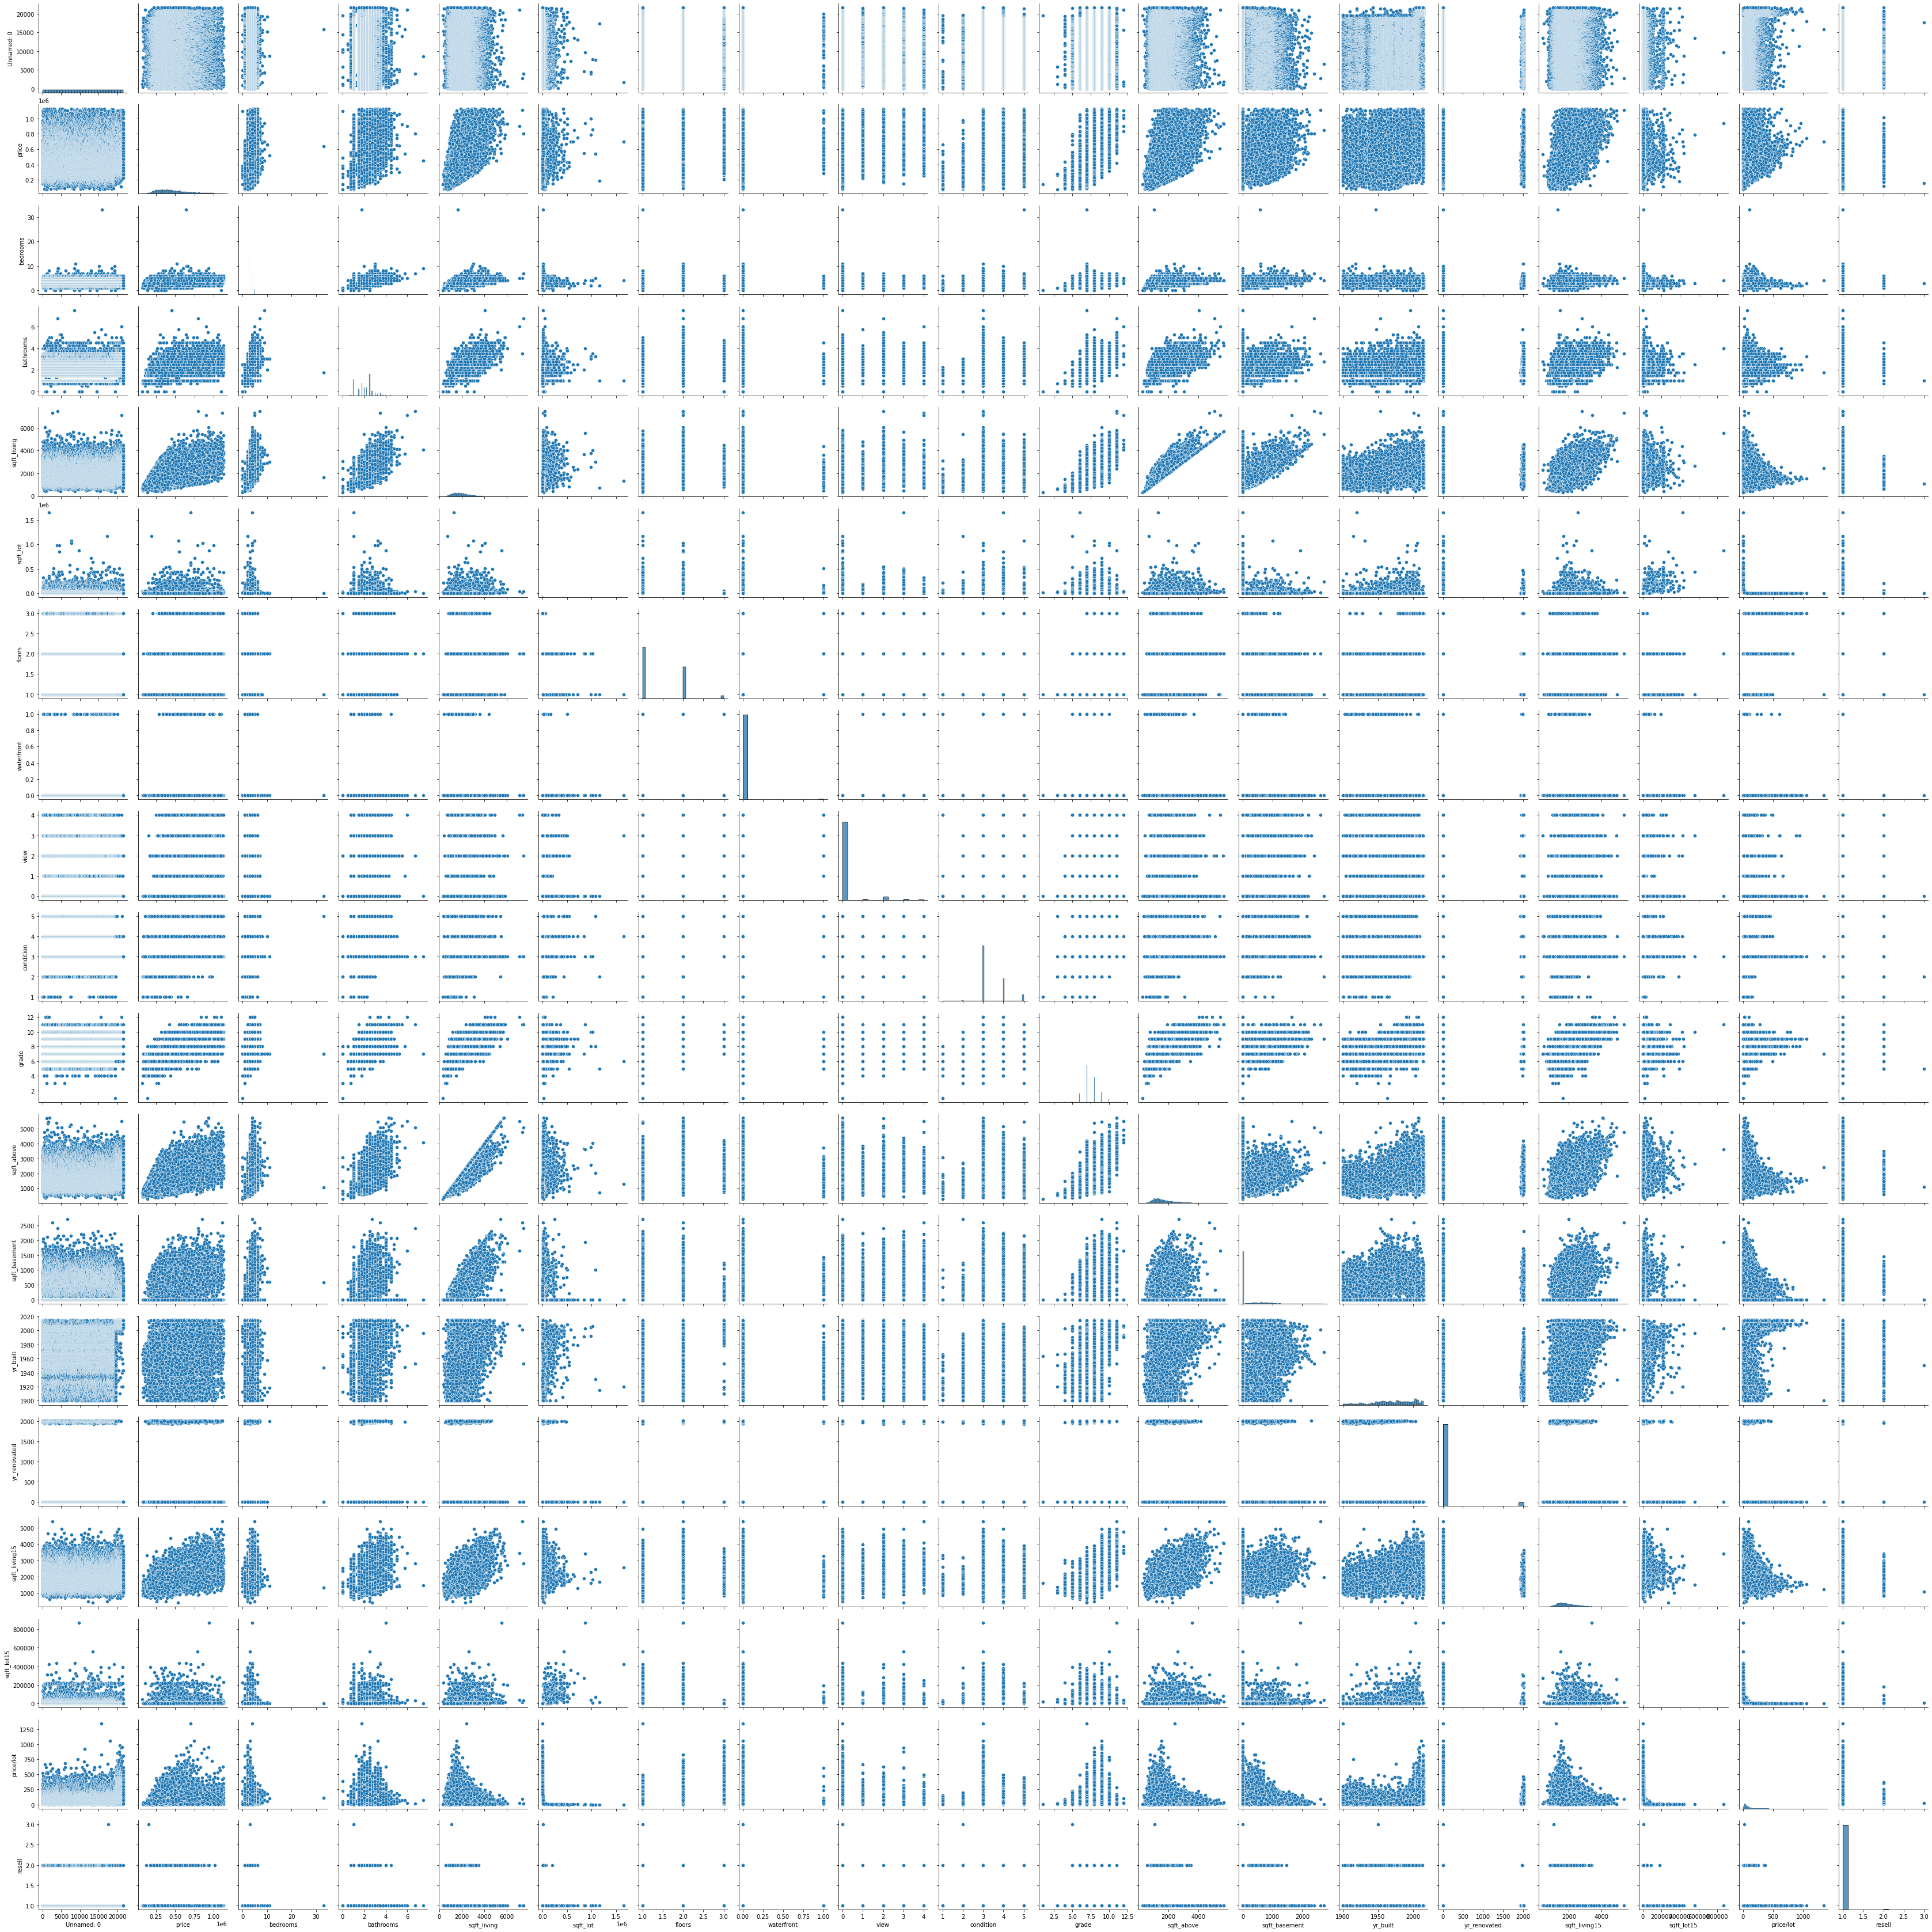

In [356]:
#grafico e dataframe com todas as correlações
sns.pairplot(df_new)
df_new.corr()



In [34]:
numdf.corr()['price']

Unnamed: 0       0.027372
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.237211
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
sqft_living15    0.585379
sqft_lot15       0.082447
price/lot        0.307849
price/living     0.554703
resell          -0.013644
Ano da Venda     0.003576
Mês da Venda    -0.010081
Name: price, dtype: float64

In [35]:
df_new['floors'] = df_new['floors'].astype(np.int64)


In [36]:
df_new.corr()['price']

Unnamed: 0       0.031693
price            1.000000
bedrooms         0.296956
bathrooms        0.455927
sqft_living      0.622333
sqft_lot         0.093950
floors           0.248508
waterfront       0.051449
view             0.238268
condition        0.038275
grade            0.631182
sqft_above       0.530451
sqft_basement    0.235701
yr_built         0.061144
yr_renovated     0.083601
sqft_living15    0.562090
sqft_lot15       0.082420
price/lot        0.301536
price/living     0.465562
resell          -0.015247
Ano da Venda     0.002037
Mês da Venda    -0.013449
Name: price, dtype: float64

#colunas que tem maior correlação com o preço:
#bathrooms, sqft_living, grade, sqft_above, sqft_living15

#Gráfico da disperção do preço baseado na latitude e longitude

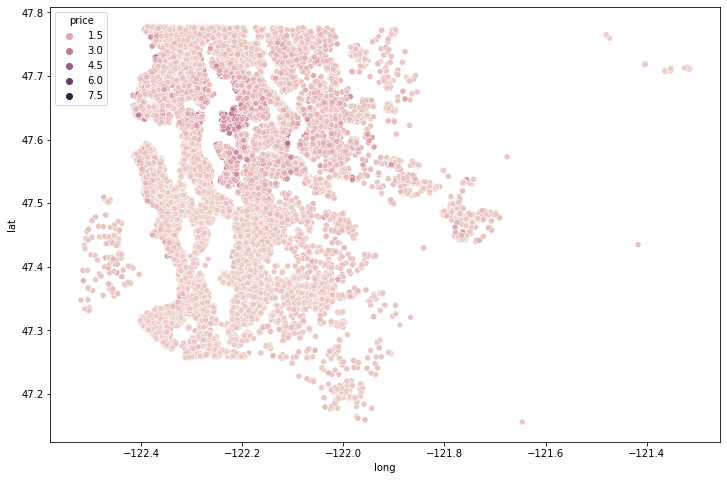

In [37]:
#lucas
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

array([[1.        , 0.45592735],
       [0.45592735, 1.        ]])

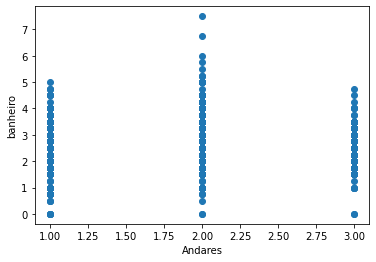

In [38]:

plt.scatter(df_new['floors'], df_new['bathrooms'])
plt.xlabel('Andares')
plt.ylabel('banheiro')
np.corrcoef(df_new['price'],df_new['bathrooms'])
np.corrcoef(df_new['price'],df_new['bathrooms'])

array([[1.        , 0.45592735],
       [0.45592735, 1.        ]])

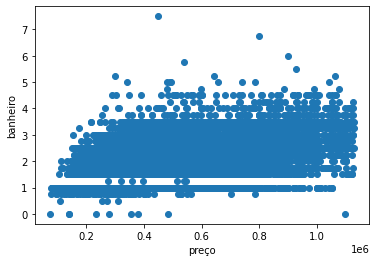

In [39]:

plt.scatter(df_new['price'], df_new['bathrooms'])
plt.xlabel('preço')
plt.ylabel('banheiro')
np.corrcoef(df_new['price'],df_new['bathrooms'])
np.corrcoef(df_new['price'],df_new['bathrooms'])


Text(0, 0.5, 'banheiros')

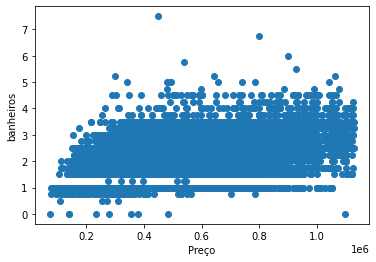

In [40]:
fig = plt.figure()
plt.scatter(df_new['price'],df_new['bathrooms'])
plt.xlabel('Preço')
plt.ylabel('banheiros')

Text(0, 0.5, 'banheiros')

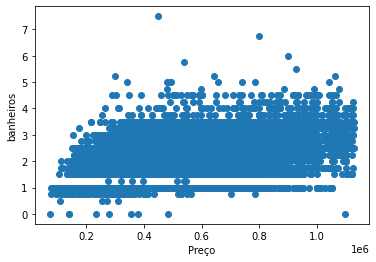

In [41]:
#Preço X banheiros
fig = plt.figure()
plt.scatter(df_new['price'],df_new['bathrooms'])
plt.xlabel('Preço')
plt.ylabel('banheiros')


Text(0, 0.5, 'Area habitável')

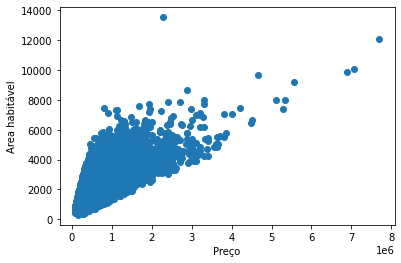

In [42]:
#preço X Area Habitavel
fig = plt.figure()
plt.scatter(numdf['price'],numdf['sqft_living'])
plt.xlabel('Preço')
plt.ylabel('Area habitável')

Text(0, 0.5, 'Qualidade dos materiais')

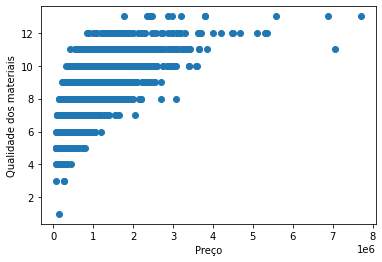

In [43]:
#preço X qualidade
fig = plt.figure()
plt.scatter(numdf['price'],numdf['grade'])
plt.xlabel('Preço')
plt.ylabel('Qualidade dos materiais')

Text(0, 0.5, 'Area habitavel acima do terreno')

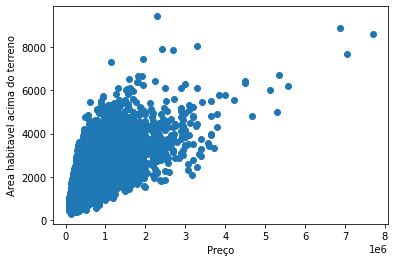

In [44]:
#preço X area acima do terreno
fig = plt.figure()
plt.scatter(numdf['price'],numdf['sqft_above'])
plt.xlabel('Preço')
plt.ylabel('Area habitavel acima do terreno')

Text(0, 0.5, 'Area Habitavel dos 15 terrenos mais próximos')

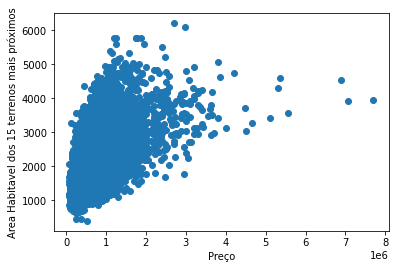

In [45]:
#Preço X area habitavel dos 15 imoveis mais proximos
fig = plt.figure()
plt.scatter(numdf['price'],numdf['sqft_living15'])
plt.xlabel('Preço')
plt.ylabel('Area Habitavel dos 15 terrenos mais próximos')


{'boxes': [<matplotlib.lines.Line2D at 0x7ff40eed8650>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff40eedd610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff40eee6b50>],
 'means': [<matplotlib.lines.Line2D at 0x7ff40eee6650>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff40eee6110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff40efc7710>,
  <matplotlib.lines.Line2D at 0x7ff40eedd0d0>]}

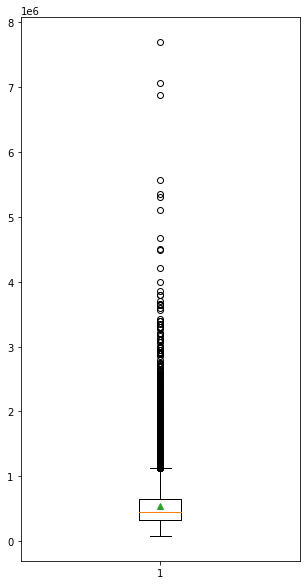

In [46]:
fig = plt.figure(figsize=(5,10))
plt.boxplot(numdf['price'],showmeans=True)

#Diferença nos dados sem outliers / com outliers

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f541fb5b790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f541fb63790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f541fb2fe90>,
 'means': [<matplotlib.lines.Line2D at 0x7f541fb2f910>,
 'medians': [<matplotlib.lines.Line2D at 0x7f541fb2f290>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f541fb5bcd0>,
  <matplotlib.lines.Line2D at 0x7f541fa62c90>]}

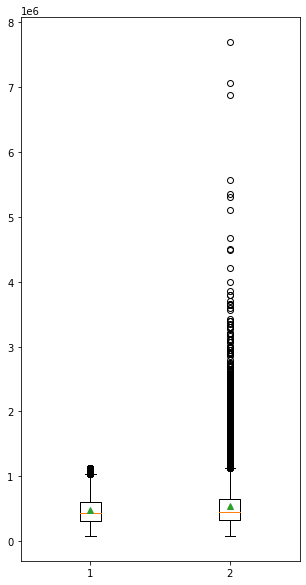

In [370]:
#lucas
fig = plt.figure(figsize=(5,10))
plt.boxplot([df_new['price'],df['price']],showmeans=True)

Text(0, 0.5, 'Frequência')

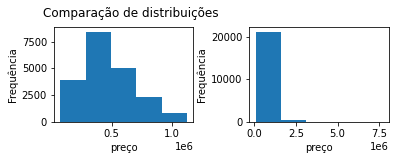

In [371]:
fig = plt.figure()
plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
fig.suptitle('Comparação de distribuições', x=0.1, y=.95, horizontalalignment = 'left', verticalalignment = 'top')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

# Cria os gráficos de histograma e acerta os nomes dos eixos
ax1.hist(df_new['price'], bins = 5)
ax1.set_xlabel('preço')
ax1.set_ylabel('Frequência')

ax2.hist(numdf['price'], bins = 5)
ax2.set_xlabel('preço')
ax2.set_ylabel('Frequência')

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

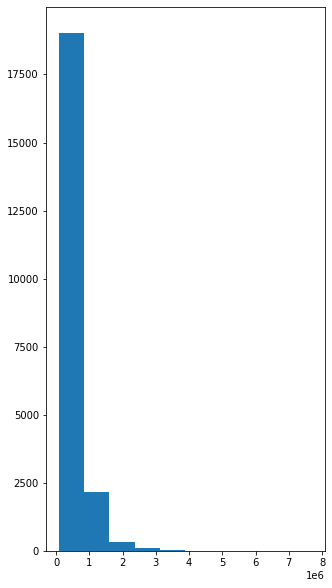

In [372]:
fig = plt.figure(figsize=(5,10))
plt.hist(numdf['price'])

#Fazer separaçao dos zipcode para avaliar as areas que tem mais valorização

calcular a media do preço de cada area zip
pegar os 10 maiores valores e os 10 menores valores
comparar a regiao para verificar as maiores e menores medias 

In [387]:
#contar quantos imoveis com o mesmo zipcode
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [388]:
df['zipcode'].value_counts()
#.mean().round(decimals=0)
df_zip = df.loc[df['zipcode'] == 98103]
precomedia = df_zip['price']
precomedia1 = precomedia.mean()
precomedia1

584919.2109634551

#Calculando o lucro e a perda quando um imóvel foi vendido mais de uma vez
#criar graficos e dataframes para deixar claro e visivel

In [376]:
# para cada imovel no dataframe:
#se o valor na coluna resell for =2, diminuir o valor da coluna preço pelo valor na coluna preço quando o resell for =1 com o mesmo id 
#se o valor na coluna resell for = 3, diminuir o valor na coluna preço pelo valor na coluna preço quando o resell for =2 com o mesmo id
#diminuir o preço pelo preço do mesmo imovel que apareceu antes(usando id para identificar)

df['resell'] = df['resell'].astype(int)

df['resell'].value_counts()

1    21436
2      176
3        1
Name: resell, dtype: int64

In [321]:
#localizando o imovel que foi vendido a terceira vez
for x in df[df['resell']==3]['id']:
  print(x)

795000620


In [113]:
#colocando 3 parametros???

#for x in df[df['resell']==3]['id']:
  #print(df[df[df['resell']==2]['id']==x]['price'])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


IndexingError: ignored

In [377]:
#localizar o imovel quando ele foi vendido a segunda vez!!!!!!
for x in df[df['resell']==3]['id']:
  print(df[df['resell']==2]['id']==x)
  

94       False
314      False
325      False
346      False
372      False
         ...  
20181    False
20613    False
20670    False
20780    False
21581    False
Name: id, Length: 176, dtype: bool


In [ ]:
#localizar o imovel quando ele foi vendido a primeira vez
for x in df[df['resell']==2]['id']:
  print(df[df['resell']==1]['id']==x)

#Removendo a linha que mostra o imovel que foi vendido pela 3 vez, porque só tem 1, seu lucro de venda não é o mais baixo nem o mais alto, sua presença apenas dificulta a analise dos lucros.

In [51]:
df[df['id'] ==795000620]

Unnamed: 0         id       date   price  bedrooms  bathrooms  \
17602       17602  795000620 2014-09-24  115000         3        1.0   
17603       17603  795000620 2014-12-15  124000         3        1.0   
17604       17604  795000620 2015-03-11  157000         3        1.0   

       sqft_living  sqft_lot  floors  waterfront  ...        state  number2  \
17602         1080      6250       1           0  ...   Washington    98168   
17603         1080      6250       1           0  ...   Washington    98168   
17604         1080      6250       1           0  ...   Washington    98168   

              country     x     y  price/lot  price/living  resell  \
17602   United States  None  None      18.40    106.481481       1   
17603   United States  None  None      19.84    114.814815       2   
17604   United States  None  None      25.12    145.370370       3   

       Ano da Venda  Mês da Venda  
17602          2014             9  
17603          2014            12  
17604          2015             3  

[3 rows x 38 columns]

In [326]:
#imovel vendido pela 3 vez
pd.DataFrame(df[df['resell']==3])

Unnamed: 0         id             date   price  bedrooms  bathrooms  \
17604       17604  795000620  20150311T000000  157000         3        1.0   

       sqft_living  sqft_lot  floors  waterfront  ...      city        county  \
17604         1080      6250     1.0           0  ...   Seattle   King County   

             state  number2         country     x     y  price/lot  \
17604   Washington    98168   United States  None  None      25.12   

       price/living  resell  
17604     145.37037       3  

[1 rows x 36 columns]

In [58]:
#removendo a linha 17604 linha da casa q foi vendida pela terceira vez
df_sem3 = df.drop([17604],axis = 0)

In [59]:
pd.DataFrame(df_sem3[df_sem3['resell']==3])


Empty DataFrame
Columns: [Unnamed: 0, id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, address, number, street, district, city, county, state, number2, country, x, y, price/lot, price/living, resell, Ano da Venda, Mês da Venda]
Index: []

[0 rows x 38 columns]

In [60]:
df[df['resell']==2]['price']

94        700000
314      1400000
325       240500
346       239900
372       530000
          ...   
20181     645000
20613     220000
20670     502000
20780     380000
21581     625000
Name: price, Length: 176, dtype: int64

#Calculo para gerar o lucro entre as vendas do msmo imovel

In [ ]:
# separando as casas que forma vendidas 2 vezes
venda2 = df[df['resell']==2]
idvenda2 = df[df['resell']==2]['id']
precovenda2 = df[df['resell']==2]['price']

# calculando o lucro
precovenda = 0
lucrovenda = 0
for id in idvenda2:
  precovenda = df[df['id']==id]['price']
  for x in precovenda:
    print(x)
precovenda
    #lucrovenda = 
    #print(lucro) 
  #lucro = precovenda[1]- precovenda[0]
  #print(precovenda)
  #print(lucro)

In [ ]:
if df['resell']== 1:
  lucro = 0#para ficar algum numero, para podermos analisar a coluna, existem casas com prejuizo acredito que 0 não fara diferença para descobrirmos o maior e menor lucro
if df['resell']==2:
  lucro = venda2 - venda1

In [65]:
# separando as casas que forma vendidas 2 vezes
venda2 = df[df['resell']==2]
idvenda2 = df[df['resell']==2]['id']
precovenda2 = df[df['resell']==2]['price']

# calculando o lucro
precovenda = list()
lucro = list()
for id in idvenda2:
  precovenda.append(df[df['id']==id]['price'])
  #print(id)
  #lucro.append(precovenda[1] - precovenda[0])
precovenda
#print(lucro)
#print(precovenda)

  #lucro=precovenda[1] - precovenda[0]
  #print(lucro)
#precosvenda2 = 

#for pre in venda2['price']:

93        94         313        314       324       325       345    \
price  430000.0  700000.0        NaN        NaN       NaN       NaN       NaN   
price       NaN       NaN  1384000.0  1400000.0       NaN       NaN       NaN   
price       NaN       NaN        NaN        NaN  232000.0  240500.0       NaN   
price       NaN       NaN        NaN        NaN       NaN       NaN  165000.0   
price       NaN       NaN        NaN        NaN       NaN       NaN       NaN   
...         ...       ...        ...        ...       ...       ...       ...   
price       NaN       NaN        NaN        NaN       NaN       NaN       NaN   
price       NaN       NaN        NaN        NaN       NaN       NaN       NaN   
price       NaN       NaN        NaN        NaN       NaN       NaN       NaN   
price       NaN       NaN        NaN        NaN       NaN       NaN       NaN   
price       NaN       NaN        NaN        NaN       NaN       NaN       NaN   

          346       371       372    ...     20180     20181     20612  \
price       NaN       NaN       NaN  ...       NaN       NaN       NaN   
price       NaN       NaN       NaN  ...       NaN       NaN       NaN   
price       NaN       NaN       NaN  ...       NaN       NaN       NaN   
price  239900.0       NaN       NaN  ...       NaN       NaN       NaN   
price       NaN  315000.0  530000.0  ...       NaN       NaN       NaN   
...         ...       ...       ...  ...       ...       ...       ...   
price       NaN       NaN       NaN  ...  610000.0  645000.0       NaN   
price       NaN       NaN       NaN  ...       NaN       NaN  163800.0   
price       NaN       NaN       NaN  ...       NaN       NaN       NaN   
price       NaN       NaN       NaN  ...       NaN       NaN       NaN   
price       NaN       NaN       NaN  ...       NaN       NaN       NaN   

          20613     20669     20670     20779     20780     21580     21581  
price       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
price       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
price       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
price       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
price       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
...         ...       ...       ...       ...       ...       ...       ...  
price       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
price  220000.0       NaN       NaN       NaN       NaN       NaN       NaN  
price       NaN  449990.0  502000.0       NaN       NaN       NaN       NaN  
price       NaN       NaN       NaN  240000.0  380000.0       NaN       NaN  
price       NaN       NaN       NaN       NaN       NaN  594866.0  625000.0  

[176 rows x 353 columns]

In [61]:
# separando as casas que forma vendidas 2 vezes
venda2 = df_sem3[df_sem3['resell']==2]
idvenda2 = df_sem3[df_sem3['resell']==2]['id']
precovenda2 = df_sem3[df_sem3['resell']==2]['price']
posicao = list()

# calculando o lucro
precovenda =list()
lucro = list()
for x,id in enumerate(idvenda2):
  precovenda.append(df_sem3[df_sem3['id']==id]['price'])
pd.DataFrame(precovenda) 
  #print(id)
  #lucro.append(precovenda[0][1] - precovenda[0][0])
#print(lucro)
  
  #lucro=precovenda[1] - precovenda[0]
  #print(lucro)
#precosvenda2 = 

#for pre in venda2['price']:
  


93        94         313        314       324       325       345    \
price  430000.0  700000.0        NaN        NaN       NaN       NaN       NaN   
price       NaN       NaN  1384000.0  1400000.0       NaN       NaN       NaN   
price       NaN       NaN        NaN        NaN  232000.0  240500.0       NaN   
price       NaN       NaN        NaN        NaN       NaN       NaN  165000.0   
price       NaN       NaN        NaN        NaN       NaN       NaN       NaN   
...         ...       ...        ...        ...       ...       ...       ...   
price       NaN       NaN        NaN        NaN       NaN       NaN       NaN   
price       NaN       NaN        NaN        NaN       NaN       NaN       NaN   
price       NaN       NaN        NaN        NaN       NaN       NaN       NaN   
price       NaN       NaN        NaN        NaN       NaN       NaN       NaN   
price       NaN       NaN        NaN        NaN       NaN       NaN       NaN   

          346       371       372    ...     20180     20181     20612  \
price       NaN       NaN       NaN  ...       NaN       NaN       NaN   
price       NaN       NaN       NaN  ...       NaN       NaN       NaN   
price       NaN       NaN       NaN  ...       NaN       NaN       NaN   
price  239900.0       NaN       NaN  ...       NaN       NaN       NaN   
price       NaN  315000.0  530000.0  ...       NaN       NaN       NaN   
...         ...       ...       ...  ...       ...       ...       ...   
price       NaN       NaN       NaN  ...  610000.0  645000.0       NaN   
price       NaN       NaN       NaN  ...       NaN       NaN  163800.0   
price       NaN       NaN       NaN  ...       NaN       NaN       NaN   
price       NaN       NaN       NaN  ...       NaN       NaN       NaN   
price       NaN       NaN       NaN  ...       NaN       NaN       NaN   

          20613     20669     20670     20779     20780     21580     21581  
price       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
price       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
price       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
price       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
price       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
...         ...       ...       ...       ...       ...       ...       ...  
price       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
price  220000.0       NaN       NaN       NaN       NaN       NaN       NaN  
price       NaN  449990.0  502000.0       NaN       NaN       NaN       NaN  
price       NaN       NaN       NaN  240000.0  380000.0       NaN       NaN  
price       NaN       NaN       NaN       NaN       NaN  594866.0  625000.0  

[176 rows x 352 columns]

In [56]:
df_imven = pd.DataFrame(precovenda).transpose().groupby(level=0, axis=1).sum()
df_imven.head(10)#Data frame com o preço dos imoveis que foram vendidos mais de uma vez com as vezes que ele foi vendido
df_imven['id'] = df[df['id']]

price
93    430000.0
94    700000.0
313  1384000.0
314  1400000.0
324   232000.0
325   240500.0
345   165000.0
346   239900.0
371   315000.0
372   530000.0

In [ ]:
#adicionando as demais colunas

In [ ]:
#df_imven['position'] = posicao
#df_imven

In [ ]:
df[df['resell']]

In [ ]:
precovar = list()

lucro = list()
conta = 0
for venda in df['resell']:  
  if venda == 1:
    lucro.append(0)
  if venda == 2:
    lucro.append(df_imven[1]- df_imven[0])

        
  #if x == 3:
    #for id in df[df['resell']==3]['id']:
      #print(id)
     # for pre in df[df['id']==id]
    #for preco in df[df['resell'] == 3]['price']:
      #print(z)
#for id in df['id']:
 # for pre in df[df['id']==id]['price']:
  #  for x in df['resell']:  
    #  if x == 1:
    #    lucro.append(0)
      #if x == 2:
    #for y in df[df['resell']==2]['price']:
      #print(y)
  #if x == 3:
    #for id in df[df['resell']==3]['id']:
      #print(id)
      #for pre in df[df['id']==id]
    #for preco in df[df['resell'] == 3]['price']:
      #print(z)

    


In [137]:
lucro = list()
controle = list()

for x in df['resell']:  
  #if x == 1:
    #lucro.append(0)
  #if x == 2:
    #for y in df[df['resell']==2]['price']:
      #print(y)
  #if x == 3:
    #for id in df[df['resell']==3]['id']:
      print(id)
      for pre in df[df['id']==id]
    #for preco in df[df['resell'] == 3]['price']:
      #print(z)
    


795000620


In [135]:
df[df['id'] == 795000620]

Unnamed: 0         id             date   price  bedrooms  bathrooms  \
17602       17602  795000620  20140924T000000  115000         3        1.0   
17603       17603  795000620  20141215T000000  124000         3        1.0   
17604       17604  795000620  20150311T000000  157000         3        1.0   

       sqft_living  sqft_lot  floors  waterfront  ...      city        county  \
17602         1080      6250     1.0           0  ...   Seattle   King County   
17603         1080      6250     1.0           0  ...   Seattle   King County   
17604         1080      6250     1.0           0  ...   Seattle   King County   

             state  number2         country     x     y  price/lot  \
17602   Washington    98168   United States  None  None      18.40   
17603   Washington    98168   United States  None  None      19.84   
17604   Washington    98168   United States  None  None      25.12   

       price/living  resell  
17602    106.481481       1  
17603    114.814815       2  
17604    145.370370       3  

[3 rows x 36 columns]

In [ ]:
# teste de um id entre os que apareceram mais de 1 vez
df.loc[df['id']==6021501535]


Unnamed: 0          id             date   price  bedrooms  bathrooms  \
93          93  6021501535  20140725T000000  430000         3        1.5   
94          94  6021501535  20141223T000000  700000         3        1.5   

    sqft_living  sqft_lot  floors  waterfront  ...      city    county  \
93         1580      5000     1.0           0  ...   Ballard   Seattle   
94         1580      5000     1.0           0  ...   Ballard   Seattle   

           state      number2  country               x     y  price/living  \
93   King County   Washington    98117   United States  None    272.151899   
94   King County   Washington    98117   United States  None    443.037975   

    price/lot  resell  
93       86.0       1  
94      140.0       2  

[2 rows x 36 columns]

In [ ]:
df['zipcode'].count()


21613

# Dado os lucros/perdas, comparar com casas com as mesmas caracteristicas, que so apareceram uma vez, para predizer lucros/perdas e descobrir as melhores/piores

#Obs talves tenha casas que dão maiores lucros/perdas mesmo estando em areas distantes e com caracteristicas diferentes da amostra tirada baseada nas que apareceram mais de uma vez (amostra muito pequena 177/21613)
#Discutir a necessidade de outras formas para classificar as melhores e piores(atenção nos dados de area, condição da casa, vista e outros relevantes)

#removendo valores qualitativos

#Gráficos:

muitas informaçõeos tendo muito outliers, necessario redução dos dados, para poder avaliar com mais acuracy (ja filtrados pelo lucro/perda dos vendidos mais de uma vez?)

SyntaxError: ignored

In [ ]:
#fazendo um gráfico scatter para verificar 

In [ ]:
df

NameError: ignored

--------------------------------------------------------------------------------

In [ ]:
#correlacionar as colunas
#sns.pairplot(df)

In [ ]:
#como conseguir um valor de uma linha/coluna determinando uma coluna


#def variacao(val1,val2):
  #val1 = df['price'][index(df[''])]

In [ ]:
for x in df:
  if df['resell']>1:
    df['price'][-1] - df['price'][-2]



ValueError: ignored

In [ ]:
#diminuir o valor do preço da venda mais recente pela venda anterior(msmo imóvel)
revenda = list()
for x in df['id']:
  revenda.append(df.loc[df['id'] == x])
revenda
from tqdm import tqdm

pbar = tqdm()


KeyboardInterrupt: ignored

In [ ]:
for x in repetido:
  casas_revendidas.append(df.loc[df['id'] == x])
#pd.DataFrame(casas_revendidas)
casas_revendidas

In [ ]:
df.describe()

In [ ]:
#descrever so uma vez as id repetidas
juntar = list()
for x in repetido:
  if x not in juntar:
    juntar.append(x)
juntar

ValueError: ignored

In [ ]:
#df com as residencias repetidas:
df['id'] == repetido

ValueError: ignored

In [ ]:
df.corr()

In [ ]:
variave1 = list()
for x in df.index:
  print(x)

In [ ]:
#for x,y in zip(dados['lat'],dados['long']):
  #geolocator.reverse(str(dados['lat'][x])+','+str(dados['long'][y]))

KeyError: ignored

In [ ]:
#for x,y in zip(dados['lat'],dados['long']):
  #geolocator.reverse(str(x)+','+str(y))

KeyboardInterrupt: ignored

In [ ]:
#função para colocar o endereço
#def endereco(df):
  #address = geolocator.reverse(str(df['lat'])+','+str(df['long']))
  #return address

  

In [ ]:
#colocando o endereço no dataframe
#dados['address'] = dados.apply(endereco,axis=1)
#endereco(dados)

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/base.py:256: UserWarning: Unable to parse the string as Point: "Failed to create Point instance from string: unknown format.". Using the value as-is for the query. In geopy 2.0 this will become an exception.
  'exception.' % str(e), UserWarning


ValueError: ignored

In [ ]:
#geolocator = Nominatim(user_agent="geoapiExercises")
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")
#dados['address'] = geolocator.reverse(str(dados['lat'])+','+str(dados['long']))

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/base.py:256: UserWarning: Unable to parse the string as Point: "Failed to create Point instance from string: unknown format.". Using the value as-is for the query. In geopy 2.0 this will become an exception.
  'exception.' % str(e), UserWarning


ValueError: ignored

In [ ]:
#dados

In [ ]:
#!pip install geopandas
#!pip install plotly_express

In [ ]:

#import pandas as pd
#import geopandas as gpd
#import geopy
#from geopy.geocoders import Nominatim
#from geopy.extra.rate_limiter import RateLimiter
#import matplotlib.pyplot as plt
#import plotly_express as px
#import tqdm
#from tqdm.notebook import tqdm_notebook

In [ ]:
#locator = Nominatim(user_agent="myGeocoder")
#coordinates = (dados['lat'], dados['long'])
#coordinates
#cidades = locator.reverse(coordinates)
#cidades.raw

In [ ]:
#ende = list()
#for x,y in zip(dados['lat'],dados['long']):
  #ende.append(geolocator.reverse(str(x)+','+str(y))
#ende


SyntaxError: ignored